In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import requests

In [6]:
df = pd.read_csv('gainSums.csv')
df

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
0,20,"""КОРПОРАЦИЯ ВИТ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ...",Малое предприятие,1025004907080,5038038838,50 - Московская область,NaN,2016-01-08,Нет,Нет,Нет,36.0,341732.0,303726.0,184044.0,118633.0,108966.0
1,25,"""ЛАВИНА"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",Малое предприятие,1035010952624,5027064258,50 - Московская область,г Люберцы,2016-01-08,Нет,Нет,Нет,40.0,571571.0,434461.0,249375.0,253804.0,594302.0
2,52,"""ХОЗРАСЧЕТНАЯ СТРОИТЕЛЬНО-ТЕХНОЛОГИЧЕСКАЯ ФИРМ...",Среднее предприятие,1025007270551,5027006369,50 - Московская область,г Дзержинский,2016-01-08,Да,Нет,Нет,201.0,651543.0,566014.0,584219.0,683396.0,1565001.0
3,4651,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""2МЕН ГРУПП ДЕВЕЛОПМЕНТ""",Малое предприятие,1067746424899,7701651356,72 - Тюменская область,г Тюмень,2017-10-08,Да,Нет,Нет,19.0,152321.0,119682.0,64999.0,85623.0,74252.0
4,4653,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""777""",Малое предприятие,1021400692048,1414006922,77 - г.Москва,NaN,2017-10-08,Да,Нет,Нет,35.0,427117.0,397084.0,685315.0,938983.0,1002486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,560903,СОВМЕСТНОЕ ПРЕДПРИЯТИЕ ОБЩЕСТВО С ОГРАНИЧЕННОЙ...,Среднее предприятие,1026500785673,6504043928,65 - Сахалинская область,г Корсаков,2016-01-08,Да,Нет,Нет,145.0,552460.0,190428.0,988266.0,927838.0,326663.0
10569,565172,СТРОИТЕЛЬНО-ИНВЕСТИЦИОННАЯ КОМПАНИЯ ОБЩЕСТВО С...,Малое предприятие,1032307179409,2312105041,23 - Краснодарский край,г Краснодар,2017-10-08,Нет,Нет,Нет,16.0,0.0,713744.0,0.0,1102772.0,414730.0
10570,576233,"УПРАВЛЕНИЕ МЕХАНИЗИРОВАННЫХ РАБОТ "" КАСКАД "" (...",Малое предприятие,1022300509637,2301032458,23 - Краснодарский край,NaN,2017-10-08,Нет,Нет,Нет,24.0,225155.0,137208.0,44640.0,25739.0,9009.0
10571,580133,"ФИРМА ""ТЕПЛОСТРОЙПРОЕКТ-С"" ОБЩЕСТВО С ОГРАНИЧЕ...",Малое предприятие,1032000400233,2002001476,20 - Чеченская Республика,NaN,2016-01-08,Да,Нет,Нет,67.0,644910.0,523741.0,251982.0,658249.0,646382.0


В данных находится много чего. Нам надо проанализировать процент роста компании. Не имеет смысла делать это для тех, у которых нет всех значений. Попробуем определить, какой давностью лучше пользоваться.

In [26]:
df_5years = df[df['gainSum2019'].notnull() & df['gainSum2023'].notnull()]
df_5years = df_5years[['ИНН','Категория', 'gainSum2019', 'gainSum2023']]
df_5years['gainSum2019'] = df_5years['gainSum2019'].replace(0,1)
df_5years['5_yearsGrowth'] = df_5years['gainSum2023'].div(df_5years['gainSum2019']).pow(0.2).sub(1).mul(100)
print(df_5years[df_5years['5_yearsGrowth']<0].count())
print(df_5years[df_5years['5_yearsGrowth']>0].count())


ИНН              3553
Категория        3553
gainSum2019      3553
gainSum2023      3553
5_yearsGrowth    3553
dtype: int64
ИНН              5071
Категория        5071
gainSum2019      5071
gainSum2023      5071
5_yearsGrowth    5071
dtype: int64
ИНН              0
Категория        0
gainSum2019      0
gainSum2023      0
5_yearsGrowth    0
dtype: int64


Прибыль 5071 из 8624 рассматриваемых предприятий возросла. Это 58.8%. Наоборот, 41.2% предприятий за пять лет начали терять деньги (прибыль убывает).
Стоит нарисовать этот график, чтобы проверить, есть ли интересности.

In [27]:
import seaborn as sb

<Axes: xlabel='ИНН', ylabel='5_yearsGrowth'>

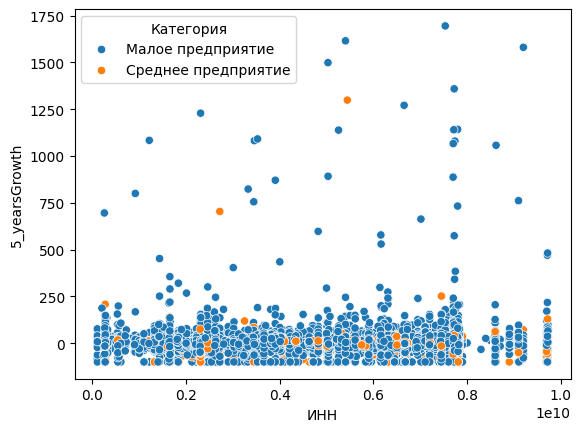

In [32]:
sb.scatterplot(x=df_5years['ИНН'], y=df_5years['5_yearsGrowth'], hue=df_5years['Категория'])

Возростания прибыли на 1000 процентов за пять лет необыкновенны. Поэтому стоит посмотреть подробнее на значения в таблицах.

In [41]:
df_5years[df_5years['5_yearsGrowth'] > 300]

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
676,7017372063,Малое предприятие,1.0,25887.0,663.161310
999,1837011426,Малое предприятие,1.0,1320.0,320.837843
1432,3327309152,Малое предприятие,1.0,67229.0,823.658285
1487,7743225092,Малое предприятие,1.0,228640.0,1079.859904
1489,7751136294,Малое предприятие,150.0,398074.0,383.921047
1728,6658430275,Малое предприятие,1.0,484611.0,1271.130064
2128,9718102870,Малое предприятие,83.0,500507.0,470.251469
2482,5405341390,Малое предприятие,1.0,1486798.0,1615.735723
2526,3447027760,Малое предприятие,1.0,45846.0,755.579342
2841,1655429709,Малое предприятие,1.0,1963.0,355.600361


Очевидно, что ошибка в способе получения значений. Конечно, что получатся огромные значения, если в первом году значение было 0. Понятно,что тогда, математически смотря, прырост бесконечно велик. Поскольку в этом году значение было 0.0, рассмотрим рисунок без них.

In [43]:
df5_years_existed = df_5years[df_5years['gainSum2019'] != 1.0]
df5_years_existed.count()

ИНН              8589
Категория        8589
gainSum2019      8589
gainSum2023      8589
5_yearsGrowth    8587
dtype: int64

<Axes: xlabel='ИНН', ylabel='5_yearsGrowth'>

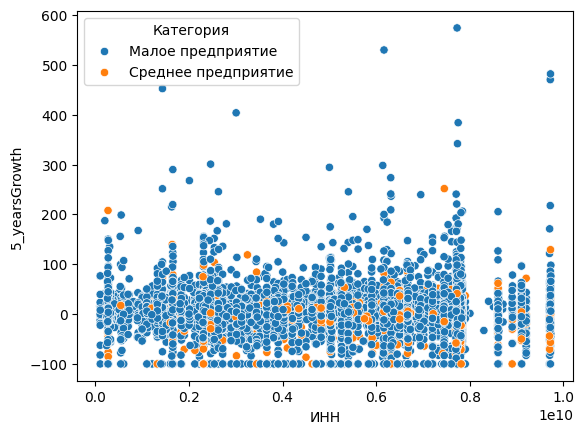

In [44]:
sb.scatterplot(x=df5_years_existed['ИНН'], y=df5_years_existed['5_yearsGrowth'], hue=df5_years_existed['Категория'])

Теперь снова видно несколько предприятий с огромной прибылью. Рассмотрим.

In [46]:
df5_years_existed[(df5_years_existed['5_yearsGrowth'] > 200) & (df5_years_existed['Категория'] == 'Среднее предприятие')]

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
1287,273075679,Среднее предприятие,2864.0,791275.0,207.801609
9005,7455013408,Среднее предприятие,5697.0,3065121.0,251.690211


In [47]:
df5_years_existed[(df5_years_existed['5_yearsGrowth'] > 200) & (df5_years_existed['Категория'] == 'Малое предприятие')]

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
1042,6141021283,Малое предприятие,258.0,258255.0,298.185835
1489,7751136294,Малое предприятие,150.0,398074.0,383.921047
1547,1633009588,Малое предприятие,2746.0,852411.0,215.057413
1745,7720456209,Малое предприятие,1317.0,447305.0,220.777276
2128,9718102870,Малое предприятие,83.0,500507.0,470.251469
2702,1655409117,Малое предприятие,815.0,271775.0,219.602656
3512,5001125442,Малое предприятие,71.0,67714.0,294.351979
3697,2631030829,Малое предприятие,765.0,376606.0,245.497699
3914,6311162735,Малое предприятие,106.0,77123.0,273.573112
4909,7736681834,Малое предприятие,584.0,983077.0,341.809386


In [71]:
df5_small_suspicious = df5_years_existed[(df5_years_existed['5_yearsGrowth'] > 200) & (df5_years_existed['Категория'] == 'Малое предприятие')]
df5_small_suspicious

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
1042,6141021283,Малое предприятие,258.0,258255.0,298.185835
1489,7751136294,Малое предприятие,150.0,398074.0,383.921047
1547,1633009588,Малое предприятие,2746.0,852411.0,215.057413
1745,7720456209,Малое предприятие,1317.0,447305.0,220.777276
2128,9718102870,Малое предприятие,83.0,500507.0,470.251469
2702,1655409117,Малое предприятие,815.0,271775.0,219.602656
3512,5001125442,Малое предприятие,71.0,67714.0,294.351979
3697,2631030829,Малое предприятие,765.0,376606.0,245.497699
3914,6311162735,Малое предприятие,106.0,77123.0,273.573112
4909,7736681834,Малое предприятие,584.0,983077.0,341.809386


In [54]:
df5_years_existed[(df5_years_existed['5_yearsGrowth'] > 200) & (df5_years_existed['Категория'] == 'Малое предприятие')][['gainSum2019',	'gainSum2023', '5_yearsGrowth']].describe()

,gainSum2019,gainSum2023,5_yearsGrowth
count,29.000000,2.900000e+01,29.000000
mean,1593.620690,8.288309e+05,302.037939
std,4780.715154,2.164817e+06,106.816334
min,6.000000,2.706000e+03,203.536838
25%,106.000000,2.323460e+05,220.777276
50%,500.000000,3.766060e+05,251.421850
75%,941.000000,5.424900e+05,341.809386
max,26026.000000,1.193199e+07,574.008581


<Axes: xlabel='ИНН', ylabel='gainSum2019'>

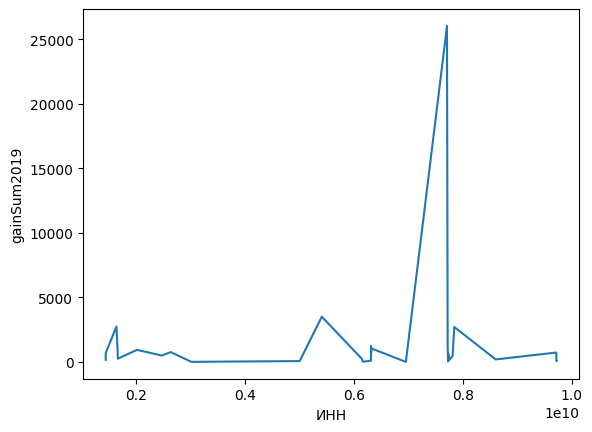

In [59]:
sb.lineplot(x=df5_small_suspicious['ИНН'], y=df5_small_suspicious['gainSum2019'])

<Axes: xlabel='ИНН', ylabel='gainSum2023'>

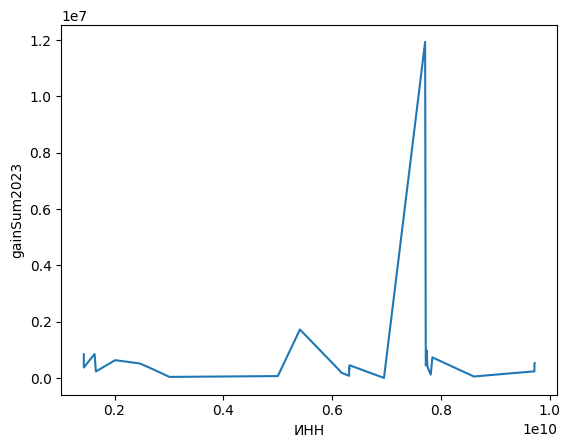

In [58]:
sb.lineplot(x=df5_small_suspicious['ИНН'], y=df5_small_suspicious['gainSum2023'])

Видно, что между выбранными значениями, отношения прибыли в 2019 году очень похожи отношениям прибыли в 2023.

<Axes: xlabel='ИНН', ylabel='gainSum2023'>

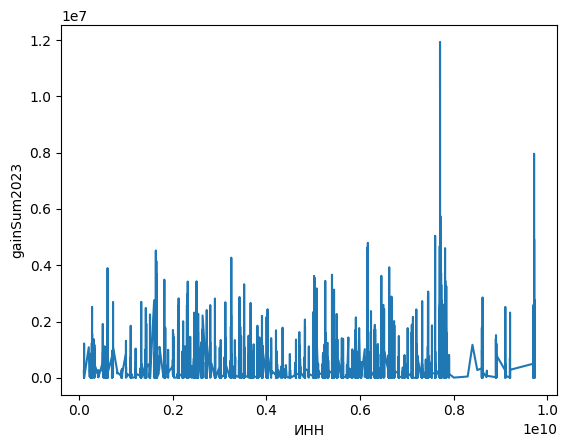

In [60]:
sb.lineplot(x=df_5years['ИНН'], y=df_5years['gainSum2023'])

<Axes: xlabel='ИНН', ylabel='gainSum2019'>

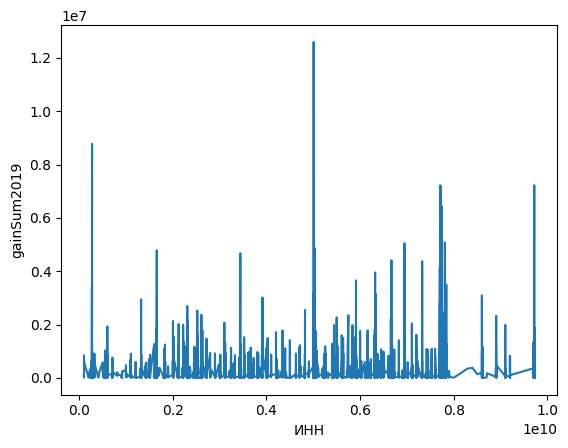

In [61]:
sb.lineplot(x=df_5years['ИНН'], y=df_5years['gainSum2019'])

Схожесть слабее на всем датасете.

Эти значения роста огромны. Они больше всего относятся к малым предприятиям, но малых предприятий гораздо больше.

In [70]:
df5_years_existed[df5_years_existed['Категория'] == 'Малое предприятие'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7812 entries, 0 to 10572
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ИНН            7812 non-null   int64  
 1   Категория      7812 non-null   object 
 2   gainSum2019    7812 non-null   float64
 3   gainSum2023    7812 non-null   float64
 4   5_yearsGrowth  7811 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 366.2+ KB


In [69]:
df5_years_existed[df5_years_existed['Категория'] == 'Среднее предприятие'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 2 to 10568
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ИНН            777 non-null    int64  
 1   Категория      777 non-null    object 
 2   gainSum2019    777 non-null    float64
 3   gainSum2023    777 non-null    float64
 4   5_yearsGrowth  776 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 36.4+ KB


Как видно, малых предприятий на порядок больше, чем средних. Поэтому ожидаемо, что их будет больше и в тех, что быстро увеличили доходы.
Надо иметь в виду, что это не чистая прибыль, это выручка использована.

Теперь посмотрим на остальные значения. Удалим уже проанализированные значения, и нарисуем остальные. 

<Axes: xlabel='ИНН', ylabel='5_yearsGrowth'>

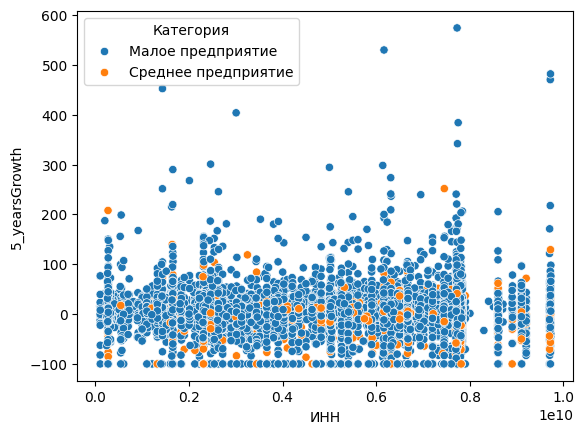

In [74]:
sb.scatterplot(x=df5_years_existed['ИНН'], y=df5_years_existed['5_yearsGrowth'], hue=df5_years_existed['Категория'])

Есть еще интересное явление: много значений на отрицательных стах процентах. Рассмотрим, что это за значения.

In [79]:
df5_over = df5_years_existed[df5_years_existed['5_yearsGrowth'] == -100]
df5_over

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
59,7720725959,Малое предприятие,38771.0,0.0,-100.0
69,7604156684,Малое предприятие,100921.0,0.0,-100.0
183,5406293244,Малое предприятие,84974.0,0.0,-100.0
229,276029529,Малое предприятие,430268.0,0.0,-100.0
237,3812070631,Малое предприятие,338080.0,0.0,-100.0
...,...,...,...,...,...
10398,2721203917,Малое предприятие,171574.0,0.0,-100.0
10434,7814371448,Среднее предприятие,1640487.0,0.0,-100.0
10465,4223713468,Малое предприятие,266135.0,0.0,-100.0
10468,5407968228,Малое предприятие,88733.0,0.0,-100.0


у 332 предприятий видимо на пять лет полностью убывает выручка. Это значит, что есть некоторый процент предприятий, которые закроются. Такой процент надо серьезно рассмотреть, поскольку он нам покажет, какие предприятия закрываются. Этот процент составляет 3.86% всех предприятий.

Снова можно проверить отношение средних к малым предприятиям.

In [80]:
df5_over[df5_over['Категория'] == 'Малое предприятие']

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
59,7720725959,Малое предприятие,38771.0,0.0,-100.0
69,7604156684,Малое предприятие,100921.0,0.0,-100.0
183,5406293244,Малое предприятие,84974.0,0.0,-100.0
229,276029529,Малое предприятие,430268.0,0.0,-100.0
237,3812070631,Малое предприятие,338080.0,0.0,-100.0
...,...,...,...,...,...
10388,273089569,Малое предприятие,260885.0,0.0,-100.0
10398,2721203917,Малое предприятие,171574.0,0.0,-100.0
10465,4223713468,Малое предприятие,266135.0,0.0,-100.0
10468,5407968228,Малое предприятие,88733.0,0.0,-100.0


In [83]:
df5_over[df5_over['Категория'] == 'Среднее предприятие']

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
896,2723093561,Среднее предприятие,625833.0,0.0,-100.0
1165,7722364257,Среднее предприятие,927680.0,0.0,-100.0
1499,7702270280,Среднее предприятие,937170.0,0.0,-100.0
1522,5402010544,Среднее предприятие,495574.0,0.0,-100.0
1961,3528062811,Среднее предприятие,447542.0,0.0,-100.0
2133,7806519394,Среднее предприятие,1180674.0,0.0,-100.0
2309,547009208,Среднее предприятие,357644.0,0.0,-100.0
2672,4312137030,Среднее предприятие,92484.0,0.0,-100.0
2789,7709916124,Среднее предприятие,1170109.0,0.0,-100.0
3147,4632175637,Среднее предприятие,48688.0,0.0,-100.0


Число средних предприятий снова на порядок меньше, что намекает на независимость двух факторов. Все-таки речь идет о предприятиях, в которых выручка была огромной, а за пять лет упала до ноля. Скорее всего это будет возможно объяснить с помощью ЕБИТДА: может быть, что выручка большая, но так же и налоги.

In [87]:
df5_over['ИНН'].values

array([7720725959, 7604156684, 5406293244,  276029529, 3812070631,
       7814619177, 5032250556, 6321241249, 5321081297, 5012078392,
       6325046753, 5003127639, 9102210701, 7733082649, 7701998894,
       5032073113, 5037004586, 9721081845, 6685158220, 7810703710,
       7604354206, 7728494076, 1655143555, 2723093561, 1657195090,
       7734353669,  264069870,  573012006, 6450070182, 7736249180,
       7705169295, 7722364257, 5004023978, 7801446978, 3123151580,
       2309130175, 3906996650, 5206023931, 2312210310, 7814139149,
       1215142198, 7702270280, 5030090297, 5402010544, 1659083949,
       3917037631, 6321369432, 7717712702, 6672309217, 7814541033,
       1660220710, 5260312307, 7107525050, 7811198516, 2301089888,
       5056008498, 1424009190, 7802528951, 6671080799, 3528062811,
       7725730198,  603017290, 7810659115, 2724169799, 2724151128,
       2508131462, 7806519394, 2539105222, 7729459966, 5959002786,
       2632805892, 5009084580,  547009208, 2225187810, 2301087

In [112]:
df_closed_analysis = df[df['ИНН'].isin(df5_over['ИНН'].values)]
print(df_closed_analysis['Наличие заключенных договоров, контрактов'].unique())
print(df_closed_analysis['Производство инновационной, высокотехнологичной продукции'].unique())
df_closed_analysis

['Нет']
['Нет']


,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
59,4978,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖСПЕЦСТРОЙМОНТАЖ""",Малое предприятие,1117746654376,7720725959,77 - г.Москва,NaN,2019-10-08,Нет,Нет,Нет,7.0,38771.0,29226.0,13064.0,26256.0,0.0
69,5044,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОМПЛЕКСНЫЕ СТРОИТЕЛЬНЫЕ...",Малое предприятие,1097604007445,7604156684,76 - Ярославская область,г Ярославль,2017-10-08,Нет,Нет,Нет,19.0,100921.0,139603.0,113380.0,81338.0,0.0
183,5548,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""СТРОИТЕЛЬНАЯ КОМПАНИЯ ""П...",Малое предприятие,1045402517478,5406293244,54 - Новосибирская область,г Новосибирск,2017-10-08,Да,Нет,Нет,2.0,84974.0,124754.0,41443.0,882.0,0.0
229,5836,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ЭСТЕЙТОФИС""",Малое предприятие,1030204208033,276029529,02 - Республика Башкортостан,г Уфа,2017-10-08,Нет,Нет,Нет,0.0,430268.0,405034.0,18163.0,5155.0,0.0
237,5890,"АКЦИОНЕРНОЕ ОБЩЕСТВО РЕГИОНАЛЬНАЯ КОМПАНИЯ ""СВ...",Малое предприятие,1023801754382,3812070631,24 - Красноярский край,г Красноярск,2017-10-08,Да,Нет,Нет,56.0,338080.0,297362.0,223052.0,91113.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,522634,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СТРОИ...,Малое предприятие,1132721006054,2721203917,27 - Хабаровский край,г Хабаровск,2016-01-08,Нет,Нет,Нет,0.0,171574.0,343152.0,168835.0,31855.0,0.0
10434,523224,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СТРОИ...,Среднее предприятие,1077847309022,7814371448,78 - г.Санкт-Петербург,NaN,2016-01-08,Нет,Нет,Нет,25.0,1640487.0,977434.0,1284322.0,475564.0,0.0
10465,524129,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ УПРАВ...,Малое предприятие,1104223001772,4223713468,42 - Кемеровская область,г Прокопьевск,2016-01-08,Да,Нет,Нет,1.0,266135.0,38724.0,40.0,NaN,0.0
10468,524164,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ УПРАВ...,Малое предприятие,1175476124229,5407968228,54 - Новосибирская область,г Новосибирск,2018-10-01,Нет,Нет,Нет,8.0,88733.0,105582.0,2150.0,2461.0,0.0


Кажется, что недостаток контрактов и инновационной технологии влияют окончательно на развитие предприятий, но надо проверить, как это относится к другим предприятиям, которые все еще работают.

In [116]:
print(df['Наличие заключенных договоров, контрактов'].describe())
print(df['Производство инновационной, высокотехнологичной продукции'].describe())

count     10573
unique        2
top         Нет
freq      10562
Name: Наличие заключенных договоров, контрактов, dtype: object
count     10573
unique        2
top         Нет
freq      10572
Name: Производство инновационной, высокотехнологичной продукции, dtype: object


Почти никто не имеет заключенные договоры или инновационные технологии. Следовательно, эти свойства не является хорошим предиктором.

Будет интересно, какова пространственная распределенность предприятий, которые теперь закрыты. Это нельзя сделать до получения дополнительных данных о геолокации.

<Axes: xlabel='ИНН', ylabel='5_yearsGrowth'>

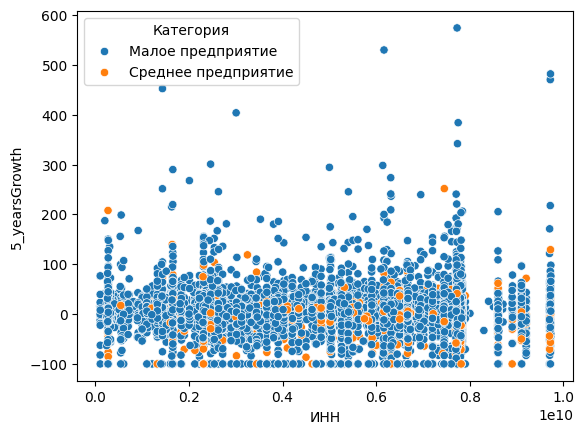

In [118]:
sb.scatterplot(x=df5_years_existed['ИНН'], y=df5_years_existed['5_yearsGrowth'], hue=df5_years_existed['Категория'])

Это график со всеми значениями. Снова видно, что средних предприятий гораздо меньше, чем малых. 
Пока рассмотрено: зачем некоторые значения слишком высоки, и зачем есть те, со значением -100. Из пока полученных данных нельзя определить, чем отличаются те, с резко повышающейся выручкой от тех, у которых она сильно упала, но это точно не из-за таких факторов, как наличие контрактов и инновационные технологии. Энтропия информации в таких столбцах настолько мала, что ими можно пренебречь. Пользуясь геоинформацией может стать более понятно, как можно предсказать успешность предприятия. Этой информации пока нет.
Теперь рассмотрим значения между 100 и -100. Вокруг нуля симметрия сильна.

In [119]:
df_symmetric = df5_years_existed[(df5_years_existed['5_yearsGrowth'] <= 100) & (df5_years_existed['5_yearsGrowth'] >= -100)]
df_symmetric

,ИНН,Категория,gainSum2019,gainSum2023,5_yearsGrowth
0,5038038838,Малое предприятие,341732.0,108966.0,-20.435182
1,5027064258,Малое предприятие,571571.0,594302.0,0.783028
2,5027006369,Среднее предприятие,651543.0,1565001.0,19.155559
3,7701651356,Малое предприятие,152321.0,74252.0,-13.385685
4,1414006922,Малое предприятие,427117.0,1002486.0,18.605900
...,...,...,...,...,...
10567,2301083597,Малое предприятие,97823.0,39472.0,-16.599312
10568,6504043928,Среднее предприятие,552460.0,326663.0,-9.975686
10570,2301032458,Малое предприятие,225155.0,9009.0,-47.466178
10571,2002001476,Малое предприятие,644910.0,646382.0,0.045608


<Axes: xlabel='ИНН', ylabel='5_yearsGrowth'>

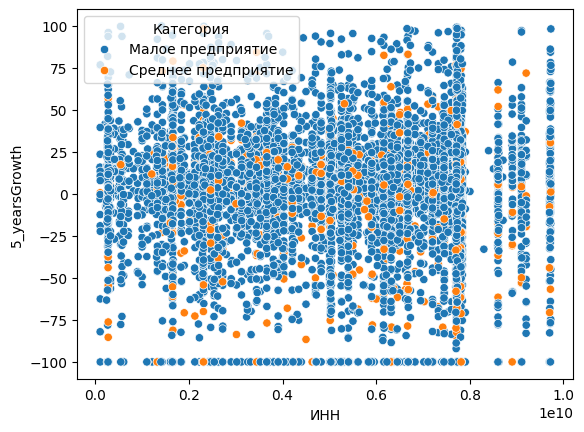

In [120]:
sb.scatterplot(x=df_symmetric['ИНН'], y=df_symmetric['5_yearsGrowth'], hue=df_symmetric['Категория'])

In [127]:
print(df_symmetric.count())
print(df5_years_existed.count())
import matplotlib.pyplot as plt

ИНН              8440
Категория        8440
gainSum2019      8440
gainSum2023      8440
5_yearsGrowth    8440
dtype: int64
ИНН              8589
Категория        8589
gainSum2019      8589
gainSum2023      8589
5_yearsGrowth    8587
dtype: int64


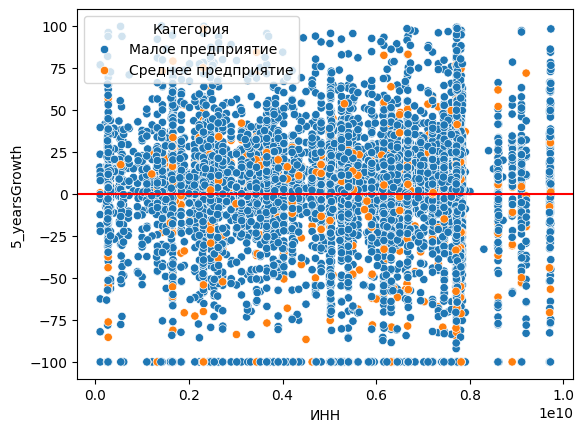

In [130]:
sb.scatterplot(x=df_symmetric['ИНН'], y=df_symmetric['5_yearsGrowth'], hue=df_symmetric['Категория'])
plt.axhline(y=0, color='red')

Остальные значения ведут себя более менее правильно. Большинство испитывает небольшой рост или упад, а с увеличением роста или упада убывает количество испитывающих такой рост или упад предприятий. Это можно более качественно рассмотреть с помощью boxplot.

<Axes: ylabel='5_yearsGrowth'>

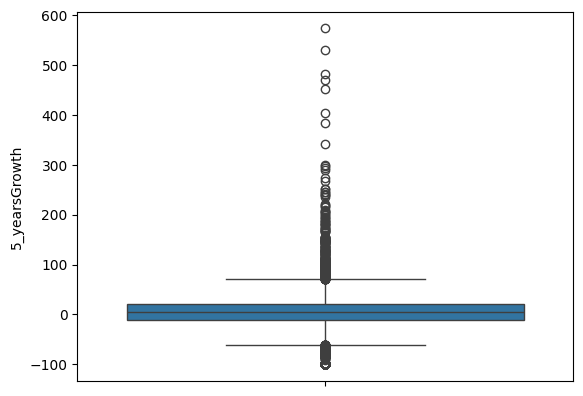

In [134]:
sb.boxplot(data=df5_years_existed['5_yearsGrowth'])

<Axes: ylabel='5_yearsGrowth'>

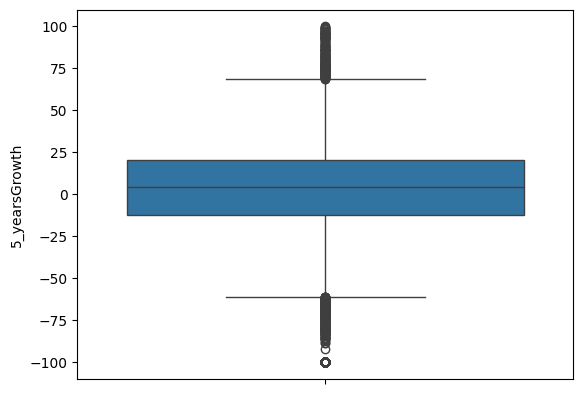

In [135]:
sb.boxplot(data=df_symmetric['5_yearsGrowth'])

Данные указывают на то, что в рассматриваемом пятилетнем периоде, большинство предприятий испитывает либо небольшой убыток либо небольшой рост. С другой стороны видно, что из выбросов более заметны те, которые резко повысили доход. В будущем стоит исследовать причины, по которым одни "выбрасываются" в одну, а другие в другую сторону. 

In [140]:
df_small_suspicious_data = df[df['ИНН'].isin(df5_small_suspicious['ИНН'])]
df_small_suspicious_data

,№ п/п,Наименование / ФИО,Категория,ОГРН,ИНН,Регион,Город,Дата включения в реестр,Наличие лицензий,"Наличие заключенных договоров, контрактов","Производство инновационной, высокотехнологичной продукции",Среднесписочная численность работников за предшествующий календарный год,gainSum2019,gainSum2020,gainSum2021,gainSum2022,gainSum2023
1042,158896,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АРМС...",Малое предприятие,1036141002226,6141021283,61 - Ростовская область,г Батайск,2016-01-08,Нет,Нет,Нет,19.0,258.0,NaN,1530.0,561648.0,258255.0
1489,183054,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВЕЛЛ...",Малое предприятие,5177746362921,7751136294,77 - г.Москва,г Троицк,2018-10-01,Нет,Нет,Нет,3.0,150.0,0.0,156836.0,120874.0,398074.0
1547,186463,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВИКАРА""",Малое предприятие,1191690075004,1633009588,16 - Республика Татарстан (Татарстан),г Казань,2019-10-10,Нет,Нет,Нет,6.0,2746.0,160746.0,147245.0,380374.0,852411.0
1745,194052,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГАЗИ...",Малое предприятие,1197746181500,7720456209,77 - г.Москва,NaN,2019-10-04,Да,Нет,Нет,22.0,1317.0,391232.0,267431.0,475041.0,447305.0
2128,212033,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДВГ ...",Малое предприятие,1187746510390,9718102870,77 - г.Москва,NaN,2020-10-08,Да,Нет,Нет,24.0,83.0,409137.0,732441.0,414069.0,500507.0
2702,235536,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНЖИ...",Малое предприятие,1181690087920,1655409117,16 - Республика Татарстан (Татарстан),г Казань,2018-10-11,Да,Нет,Нет,83.0,815.0,127804.0,243253.0,403892.0,271775.0
3512,270051,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛИФТ...",Малое предприятие,1195081018417,5001125442,50 - Московская область,г Балашиха,2019-10-04,Нет,Нет,Нет,36.0,71.0,55026.0,55022.0,60947.0,67714.0
3697,278629,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МЕГА...",Малое предприятие,1072648000842,2631030829,61 - Ростовская область,г Новочеркасск,2016-01-08,Нет,Нет,Нет,20.0,765.0,251494.0,528043.0,113831.0,376606.0
3914,288982,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МОНО...",Малое предприятие,1166313056744,6311162735,18 - Удмуртская Республика,г Ижевск,2016-01-08,Нет,Нет,Нет,11.0,106.0,4265.0,77223.0,60501.0,77123.0
4909,331144,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОМ...",Малое предприятие,5147746146818,7736681834,77 - г.Москва,NaN,2019-10-08,Нет,Нет,Нет,17.0,584.0,51178.0,576436.0,178382.0,983077.0


<Axes: xlabel='Регион', ylabel='Count'>

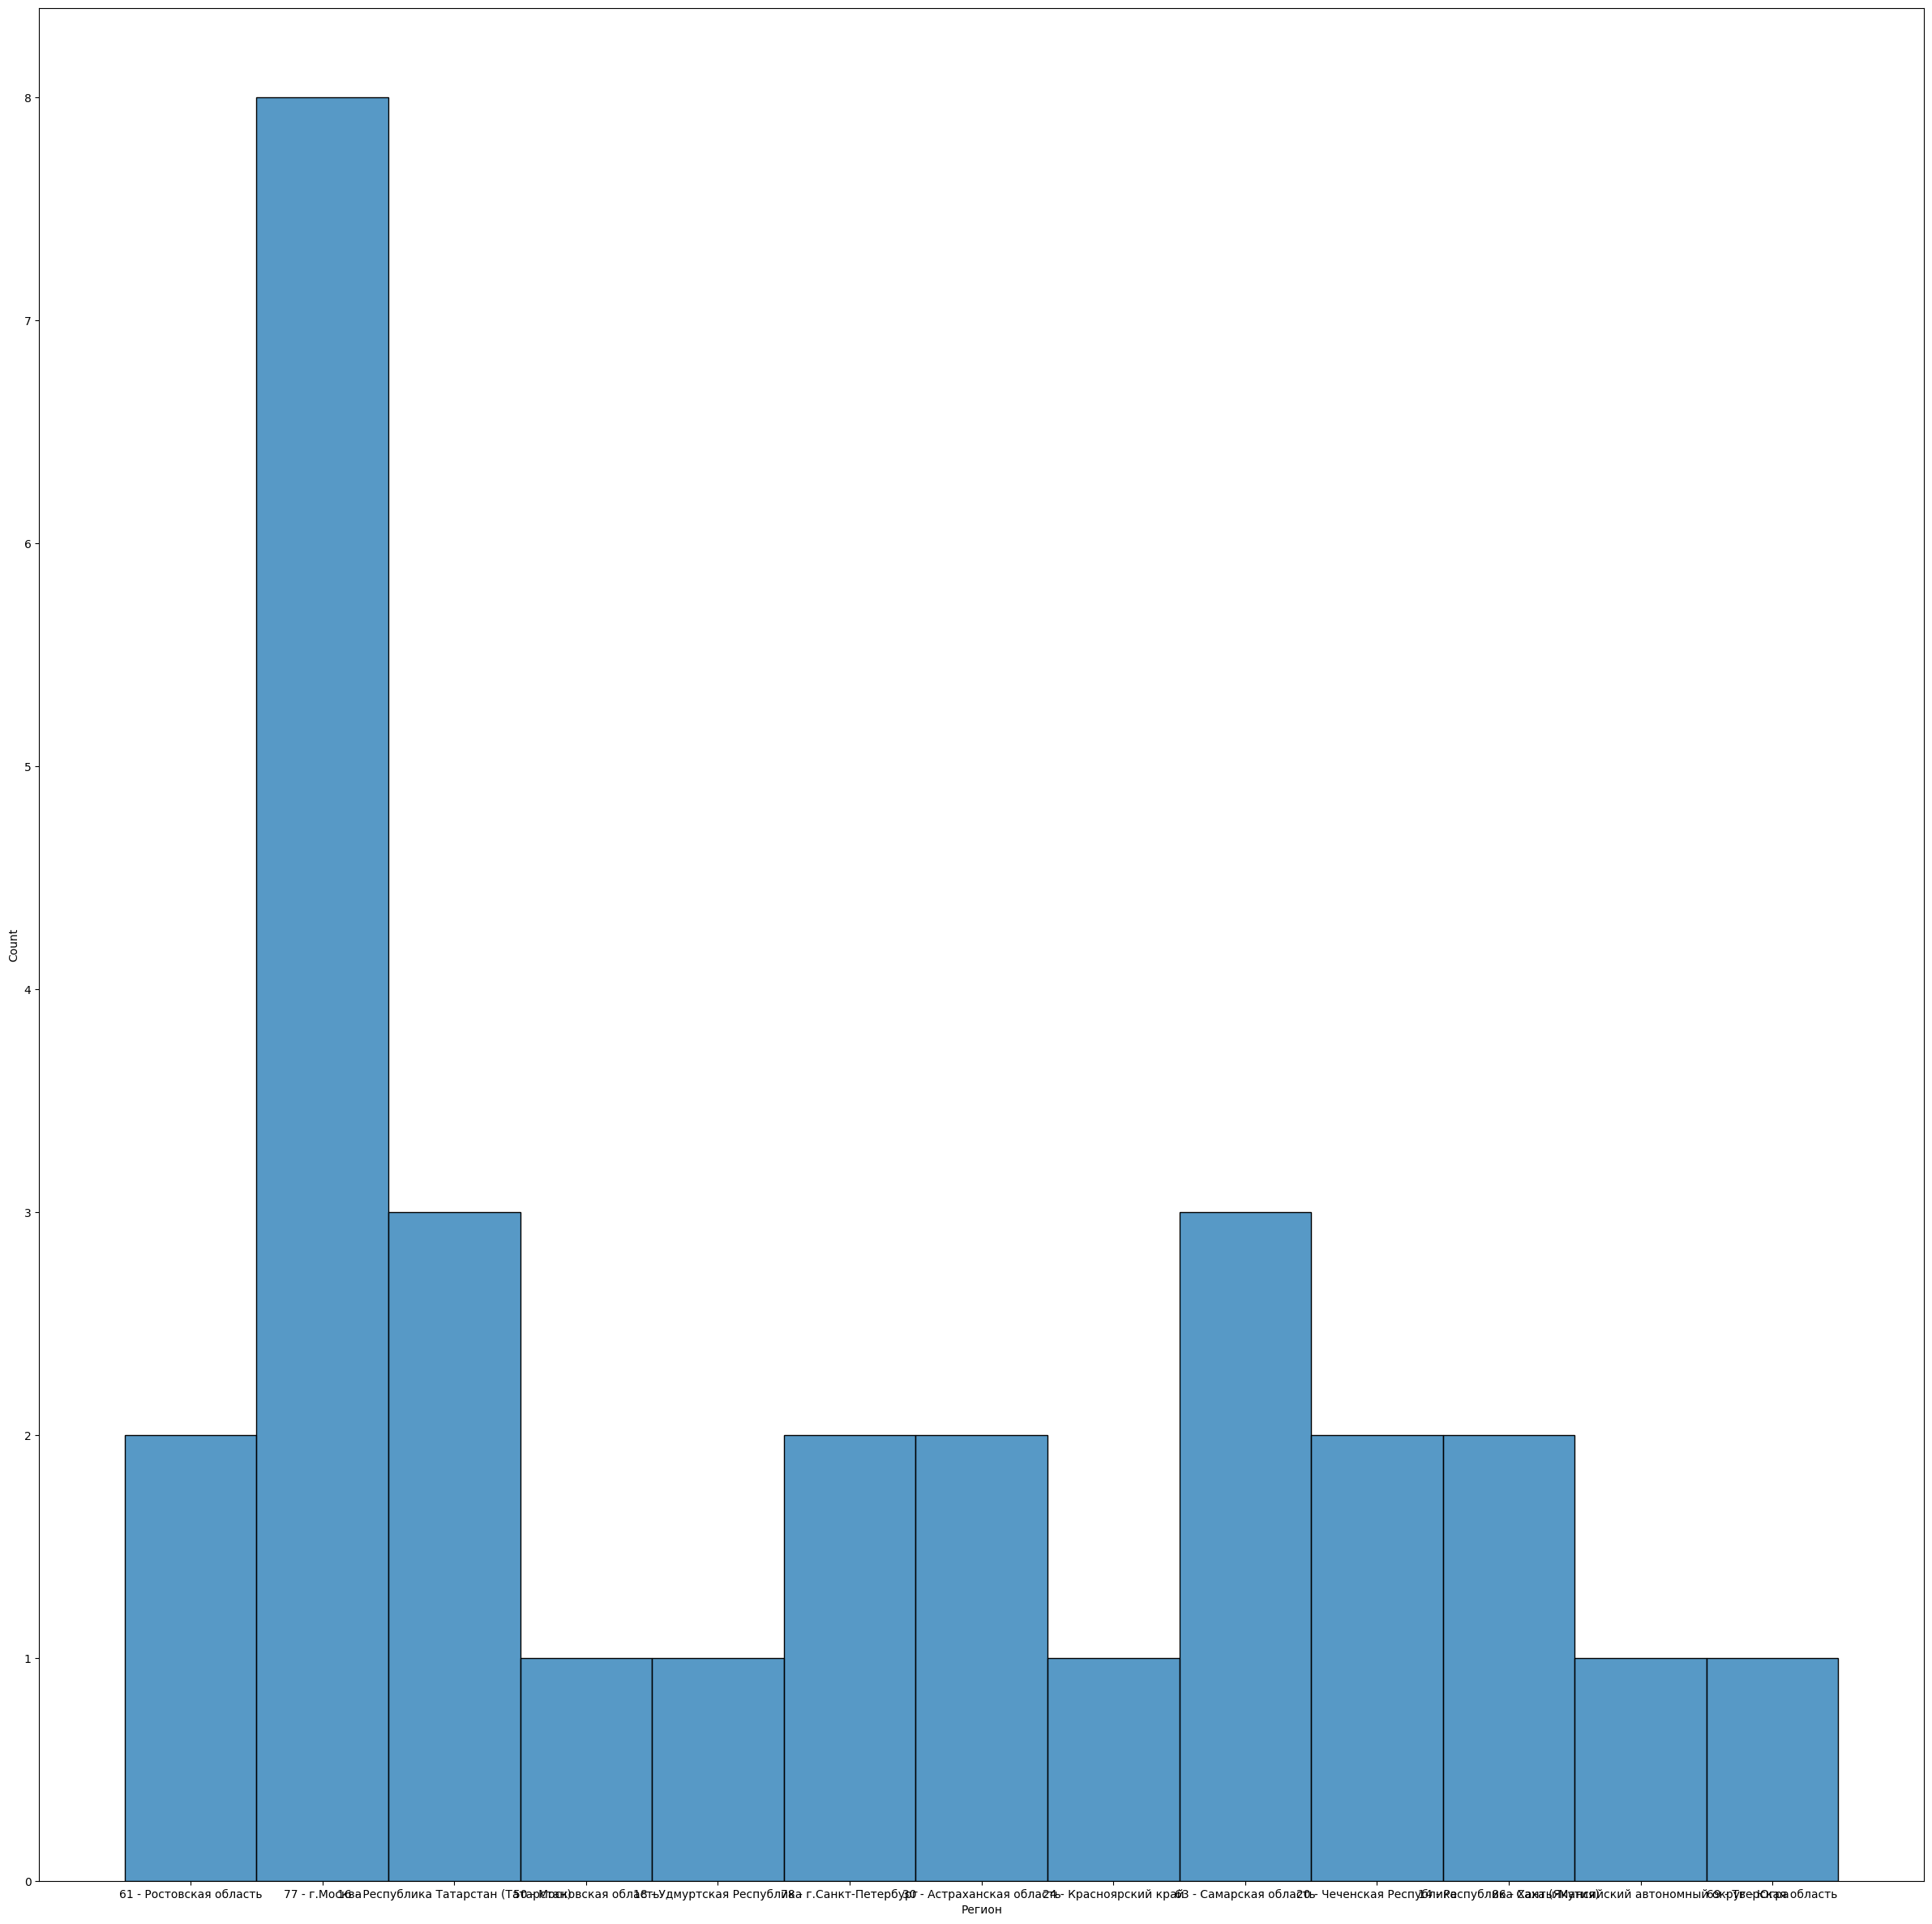

In [142]:
plt.figure(figsize=(30,30))
sb.histplot(data=df_small_suspicious_data['Регион'])

<Axes: xlabel='Регион', ylabel='Count'>

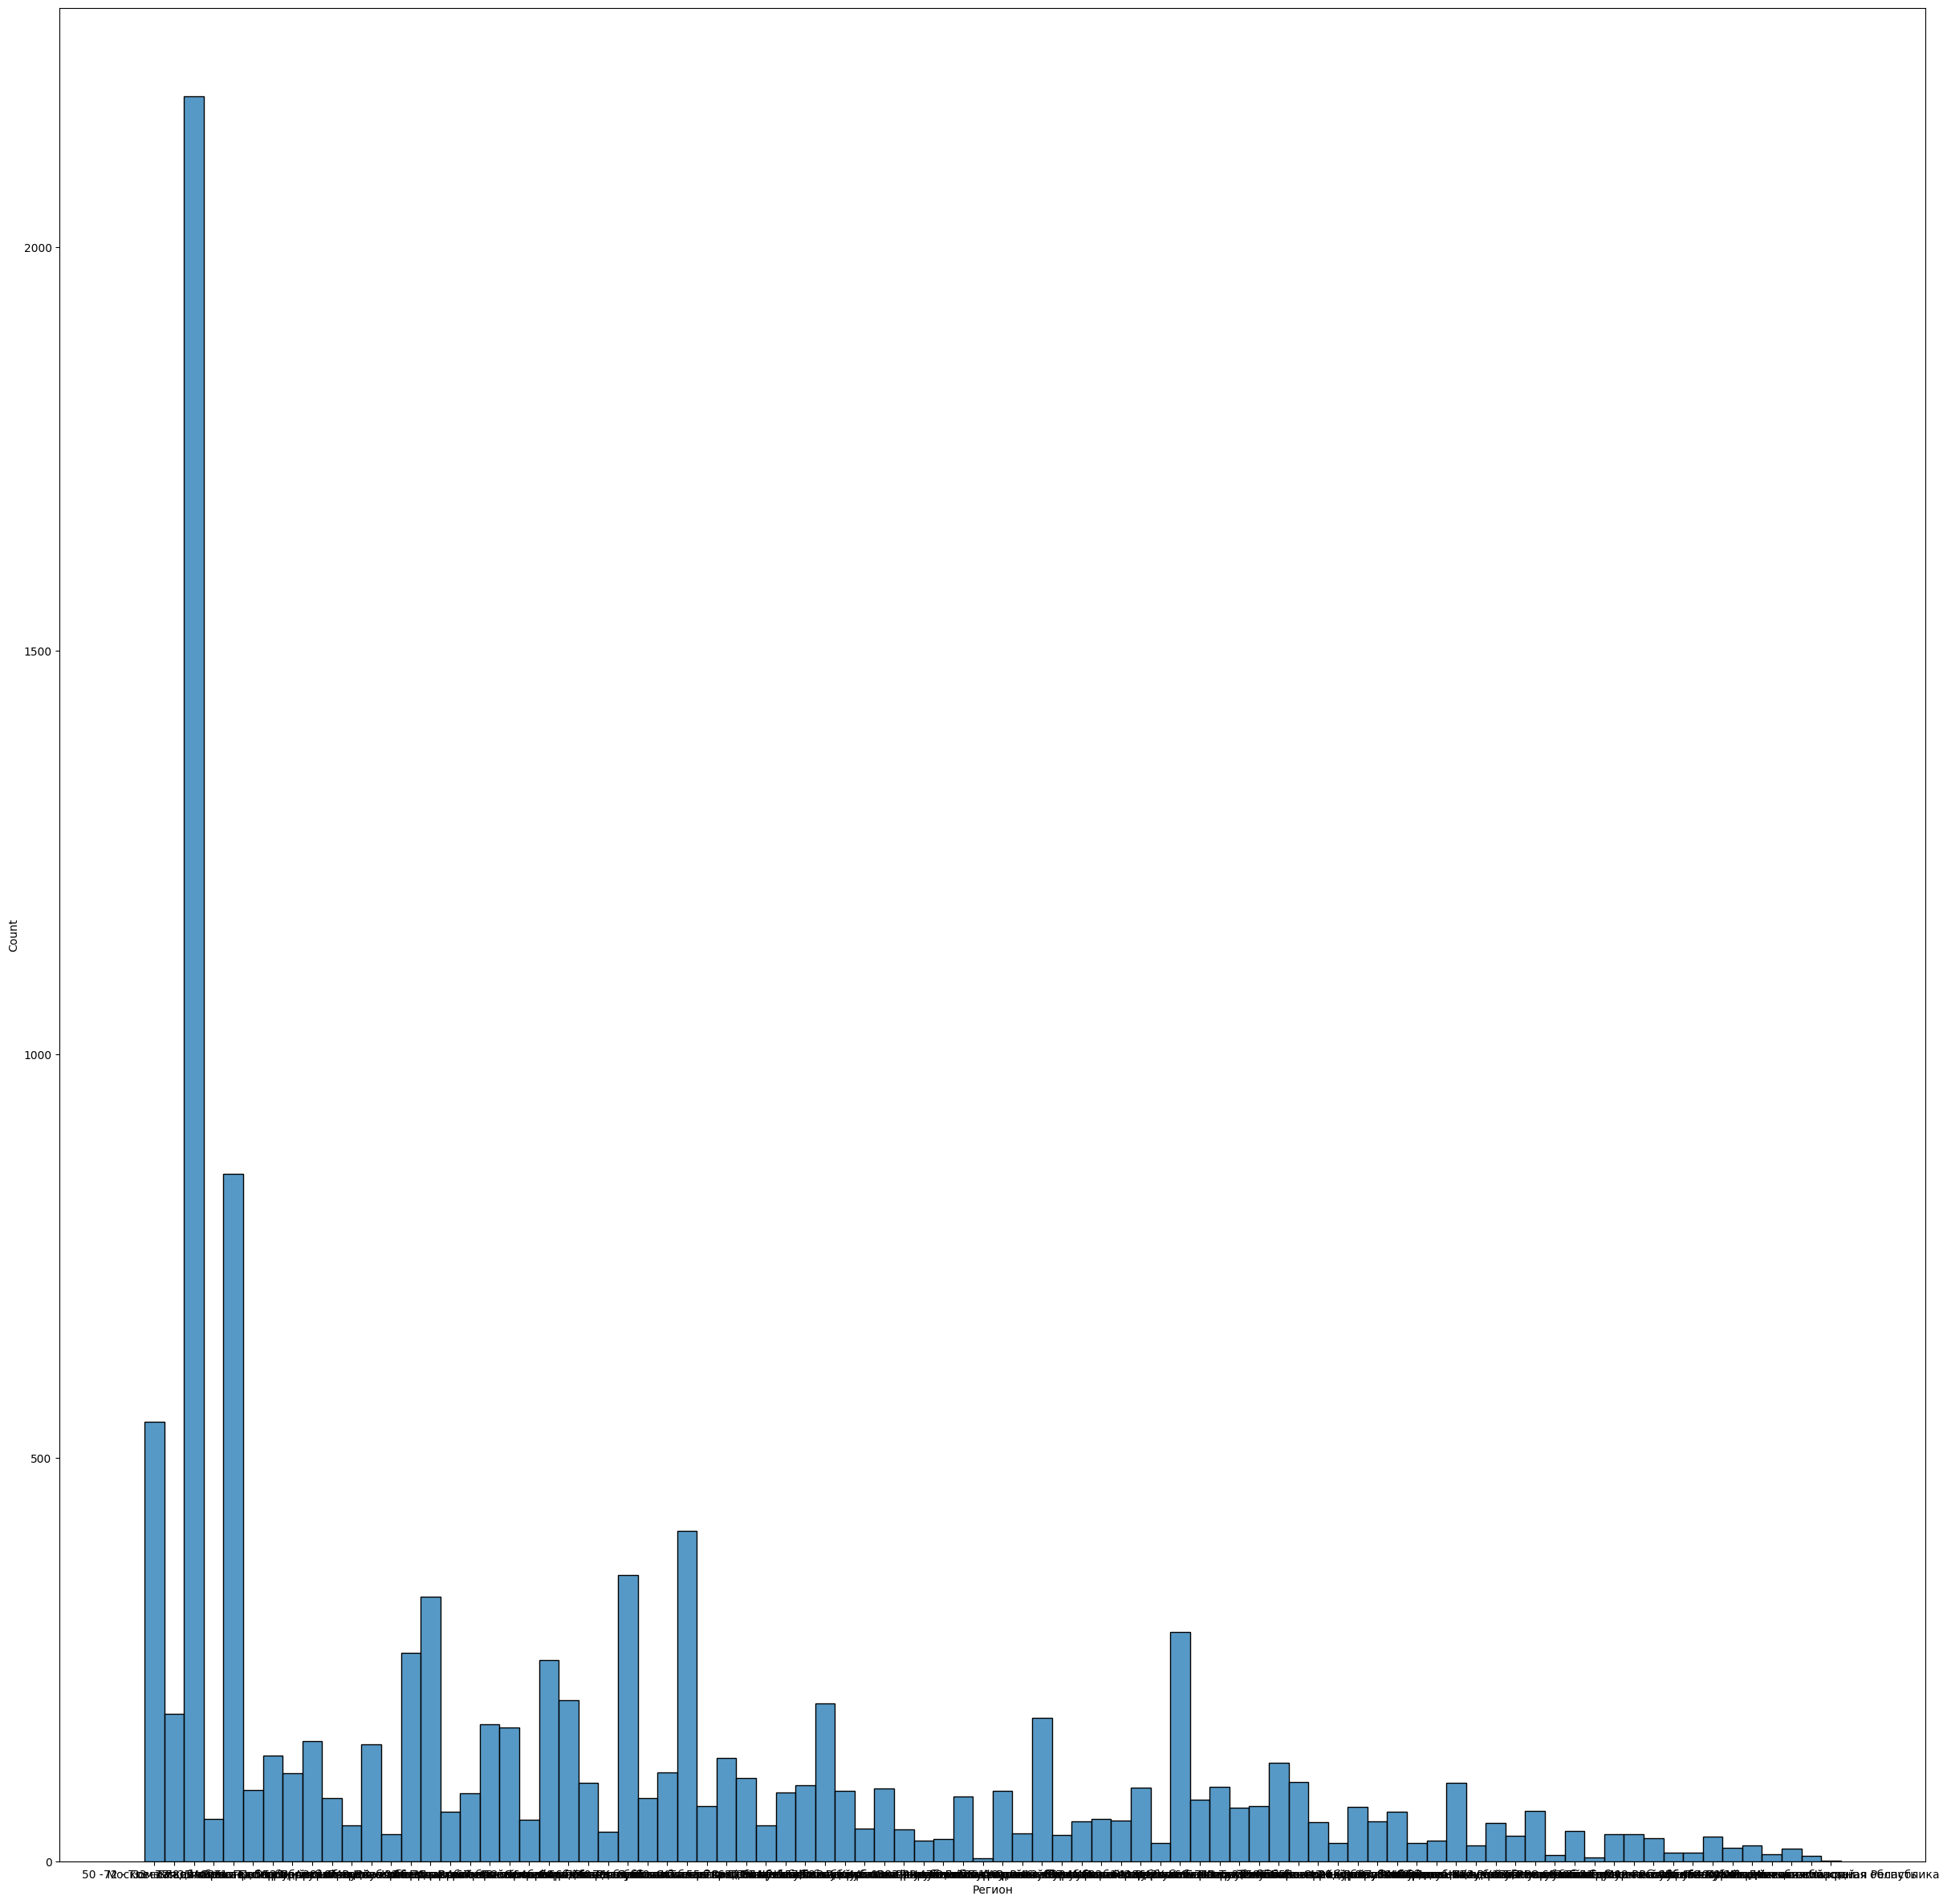

In [145]:
plt.figure(figsize=(30,30))
sb.histplot(data=df['Регион'])

Как видно, нельзя опираться ни только на регион: больше всего успешных выбросов находится в Московской области, но и большинство всех значений находится в той же области.

## Итоги

Результаты этого разведочного анализа данных следующие:
1. Пока не замечено никаких особенностей, разделяющих предприятия на группы. Все стандартные свойства: категория, наличие контрактов и инновационных технологий пока кажутся независимыми от процента роста.
2. Замечено, что есть предприятия, выручка которых резко возросла за пять лет. Пока неизвестно, почему это так, но они являются явными выбросами.
3. Также есть доля предприятий, которые за период от пять лет упали с огромного дохода до нуля. Причина такого поведения также неизвестна, но стоит углубиться в ее потенциальные причины. Возможно, геолокация сильно влияет на успешность, но таких данных пока нету.
4. Огромное большинство предприятий имеет нормальный упад или рост, вокруг 25 процентов. Это свидетельствует о некоторой постоянности в данной отрасли. Кроме того, положительных выбросов больше.
5. Надо обратить внимание на то, что хотя выше указано, что регион не влияет на распределение из-за схожести графиков, что это не совсем верно. Видно, что числа на порядки отличаются, так что, даже если качественная схожесть есть, количественно эти графики очень сильно отличаются.

<Axes: xlabel='5_yearsGrowth', ylabel='Count'>

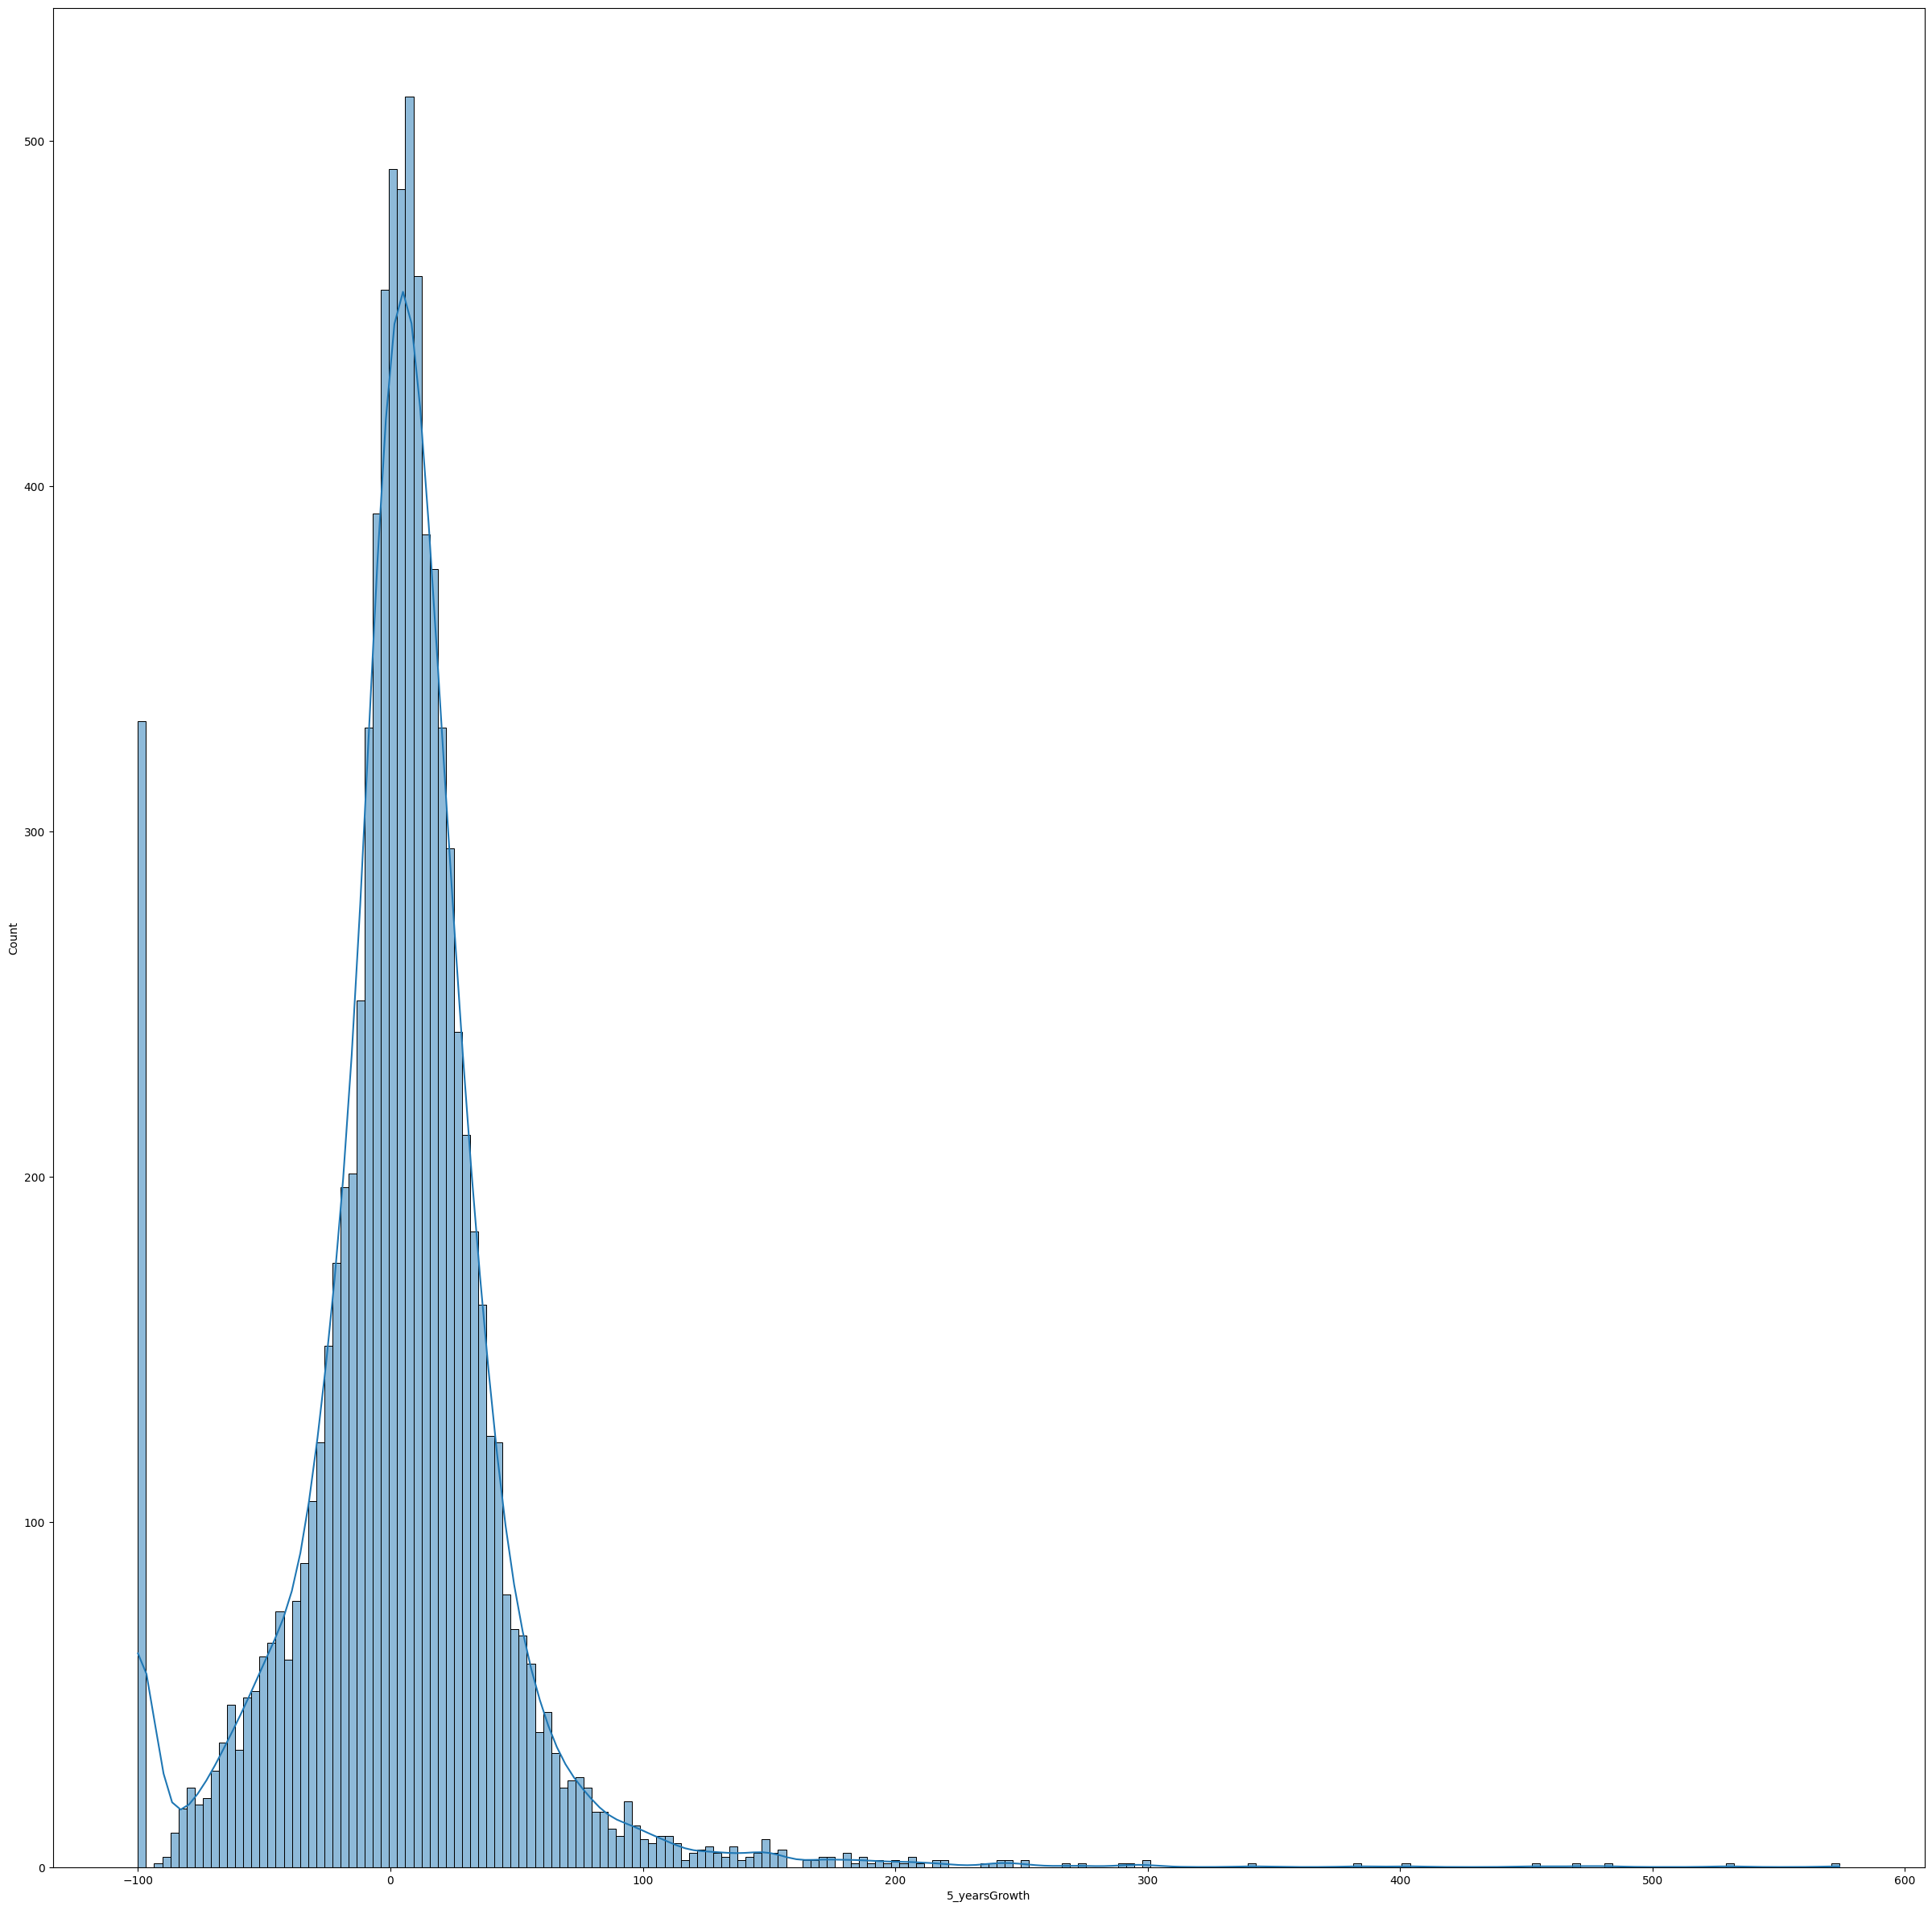

In [148]:
plt.figure(figsize=(30,30))
sb.histplot(data=df5_years_existed['5_yearsGrowth'], kde=True)

Выше объяснено, откуда берется пик на -100.

In [150]:
print(df5_years_existed[df5_years_existed['5_yearsGrowth'] == -100].count())
print(df5_years_existed[df5_years_existed['5_yearsGrowth'] >= 100].count())

ИНН              332
Категория        332
gainSum2019      332
gainSum2023      332
5_yearsGrowth    332
dtype: int64
ИНН              147
Категория        147
gainSum2019      147
gainSum2023      147
5_yearsGrowth    147
dtype: int64


In [151]:
df5_years_existed.describe()

,ИНН,gainSum2019,gainSum2023,5_yearsGrowth
count,8.589000e+03,8.589000e+03,8.589000e+03,8587.000000
mean,5.260955e+09,2.329733e+05,3.135364e+05,3.561369
std,2.469569e+09,4.221216e+05,5.178071e+05,42.468254
min,1.010092e+08,6.000000e+00,-2.102000e+03,-100.000000
25%,3.123382e+09,5.326200e+04,4.294000e+04,-11.843317
50%,5.609096e+09,1.183710e+05,1.417100e+05,4.859997
75%,7.706733e+09,2.448250e+05,3.551830e+05,21.043526
max,9.731059e+09,1.259624e+07,1.193199e+07,574.008581
